Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Examples 11.5, 11.15 and 11.18, and Figures 11.8, 11.9, 11.11 and 11.12

Analysis of a dataset with two features, corresponding to the latitude and longitude of Canadian cities\
Topics and relevant videos: [Sample mean of a vector, sample covariance matrix](https://www.youtube.com/watch?v=olyVNcJknNg), [principal component analysis](https://www.youtube.com/watch?v=hPM7F2CP9vQ), [spectral theorem](https://www.youtube.com/watch?v=l9qIW_UBiZs) 

Author: Carlos Fernandez-Granda\
Data source: https://simplemaps.com/data/canada-cities

In [1]:
import os.path
import math
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
# matplotlib.rcParams['text.usetex'] = True

from matplotlib import ticker, cm
import numpy as np
import csv
import urllib.request
import io

# filename = '../data/canada.csv'# '../../data/pca/egypt.csv'
# with open(filename, newline='') as csvfile:
#     dataset = list(csv.reader(csvfile))

url = "https://raw.githubusercontent.com/cfgranda/ps4ds/main/data/canada.csv"

with urllib.request.urlopen(url) as response:
    csvfile = io.TextIOWrapper(response, encoding='utf-8')
    dataset = list(csv.reader(csvfile))

font_size = 15
font_size_legend = 15
font_size_ticks = 15
font_size_graph = 15

n = len(dataset)-1
latitude = np.zeros(n)
longitude = np.zeros(n)

for i in range(n):
    latitude[i] = float(dataset[i+1][1])    
    longitude[i] = float(dataset[i+1][2])   
    
latitude_c = latitude - np.mean(latitude)
longitude_c = longitude - np.mean(longitude)
inds = np.arange(-np.pi,np.pi,1e-2)

Mean longitude: -91.92 Mean latitude: 52.92


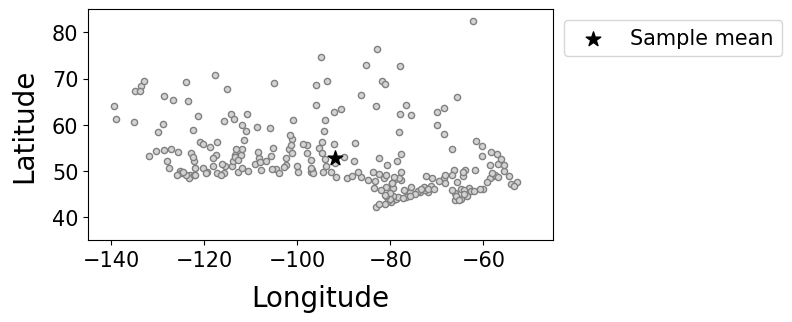

In [2]:
fig = plt.figure(figsize = (6,3)) 
plt.scatter(longitude,latitude, s=20, c="lightgray", marker='o', edgecolor="gray")
plt.scatter(np.mean(longitude),np.mean(latitude), s=120, c="black", marker='*', edgecolor="black",label="Sample mean")
plt.xlim(-145,-45)
plt.ylim(35,85)
plt.xticks(fontsize=font_size) 
plt.yticks(fontsize=font_size)
plt.ylabel("Latitude", fontsize=font_size+5,labelpad=10)
plt.xlabel("Longitude", fontsize=font_size+5,labelpad=10)
plt.legend(fontsize=font_size,bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
print("Mean longitude:",np.round(np.mean(longitude),2),"Mean latitude:",np.round(np.mean(latitude),2))

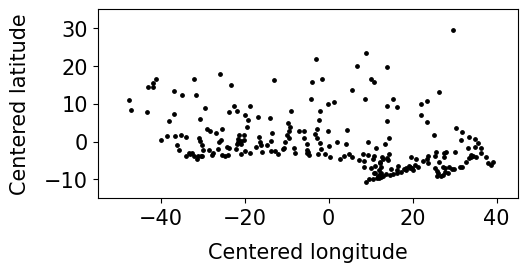

In [3]:
fig = plt.figure(figsize = (6,3)) 
plt.scatter(longitude_c,latitude_c, s=6, c="black", marker='o', edgecolor="black")
plt.xlim(-55,45)
plt.ylim(-15,35)
plt.xticks(fontsize=font_size) 
plt.yticks(fontsize=font_size)
plt.ylabel("Centered latitude", fontsize=font_size,labelpad=10)
plt.xlabel("Centered longitude", fontsize=font_size,labelpad=10)
# plt.xlim( -1, 30)
plt.gcf().subplots_adjust(bottom=0.25)
plt.gcf().subplots_adjust(left=0.2)

In [4]:
X = np.array((longitude_c,latitude_c))
n = X.shape[1]
cov = (X @ X.T) / n
eigval,U = np.linalg.eig(cov)
u_1 = U[:,0]
u_2 = U[:,1]

print("Sample covariance matrix")
print(np.round(cov,1))

print("First principal direction",np.round(u_1,3))
print("Variance in first principal direction:",round(eigval[0],1))
print("Second principal direction",np.round(u_2,3))
print("Variance in second principal direction:",round(eigval[1],1))

Sample covariance matrix
[[523.9 -59.8]
 [-59.8  53.7]]
First principal direction [ 0.992 -0.124]
Variance in first principal direction: 531.4
Second principal direction [0.124 0.992]
Variance in second principal direction: 46.2


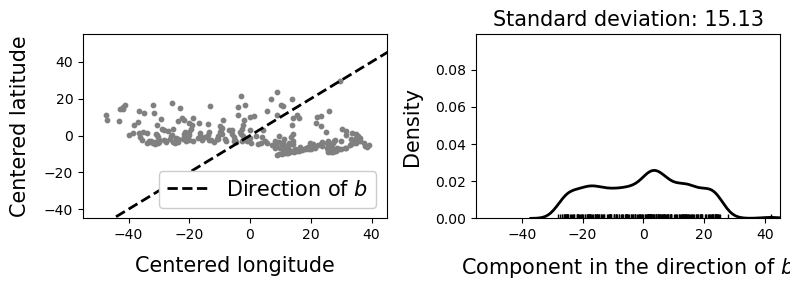

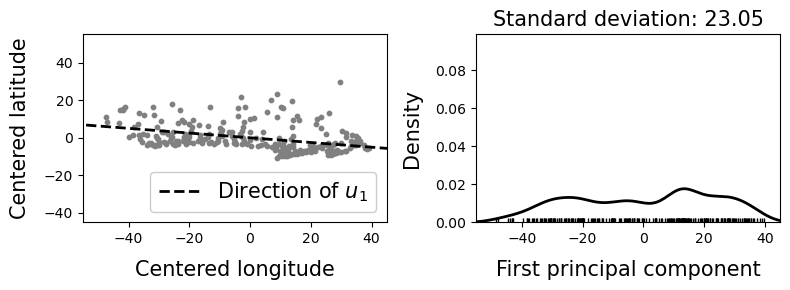

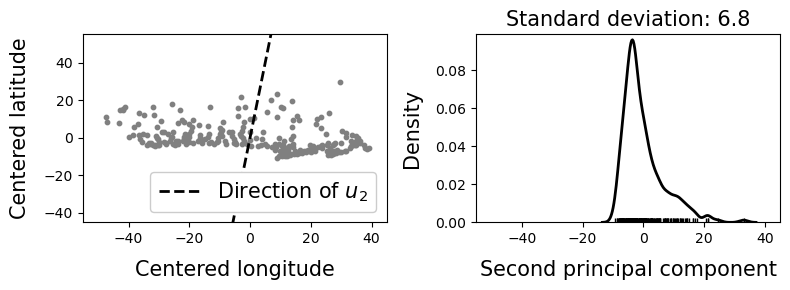

In [5]:
line_list = [np.array([np.cos(np.pi/4),np.sin(np.pi/4)]),u_1,u_2]
x_axis = [r"Component in the direction of $b$",r"First principal component",
          r"Second principal component"]
labels = [r"Direction of $b$",r"Direction of $u_1$",
          r"Direction of $u_2$"]
for i,v in enumerate(line_list):
    
    fig, axes = plt.subplots(1, 2, figsize=(8,3),width_ratios=[1,1])
    
    axes[0].scatter(longitude_c,latitude_c, s=10, c="gray", marker='o')
    axes[0].plot( [100 * v[0],-100 * v[0]], [100*v[1], -100*v[1]],'--',color='black',lw=2,label=labels[i])
    axes[0].set_xlim(-55,45)
    axes[0].set_ylim(-45,55)
    axes[0].set_ylabel("Centered latitude", fontsize=font_size,labelpad=10)
    axes[0].set_xlabel("Centered longitude", fontsize=font_size,labelpad=10)
    axes[0].legend(fontsize=font_size,loc='lower right',framealpha=1)
    
    proj_v_X = X.T @ v
    
    axes[1].set_xlim(-55,45)
    axes[1].set_ylim(0,0.099)
    axes[1].set_ylabel("Density", fontsize=font_size,labelpad=10)
    axes[1].set_xlabel(x_axis[i], fontsize=font_size,labelpad=10)
    sns.kdeplot(proj_v_X, color="black", lw=2, bw_adjust=0.6,ax=axes[1])  # KDE plot
    sns.rugplot(proj_v_X, color="black",ax=axes[1])  # Rug plot
    axes[1].set_title("Standard deviation: "+str(round(np.std(proj_v_X),2)),fontsize=font_size)
    plt.tight_layout()

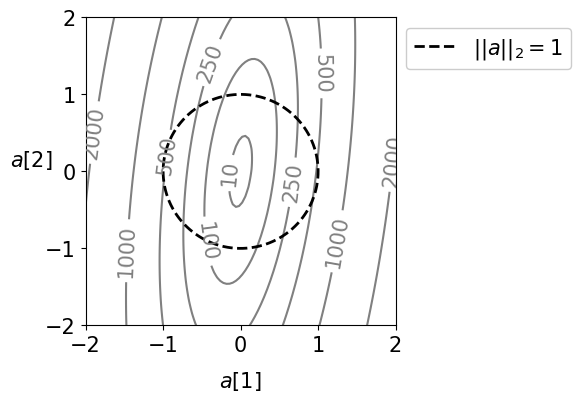

In [6]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

def quad_form(x,y):
    return cov[0,0] * x**2 + 2*cov[0,1]*x*y + cov[1,1] * y**2

X, Y = np.meshgrid(x, y)
Z = quad_form(X, Y)
level_list = [10,100,250,500,1000,2000,3000]

tick_aux = np.arange(-2,3,1)

fig = plt.figure(figsize = (4,4)) 
CS = plt.contour(X, Y, Z, levels = level_list,colors='gray')#levels=30,cmap='RdGy');
plt.clabel(CS, fontsize=font_size_ticks, inline=1,fmt = '%1.0f')#,ticks=Contourrange)
plt.plot(np.cos(inds),np.sin(inds),'--',color='black',lw=2,label=r"$||a||_2=1$")
plt.xticks(tick_aux,fontsize=font_size_ticks) 
plt.yticks(tick_aux,fontsize=font_size_ticks)
h = plt.ylabel(r"$a[2]$", fontsize=font_size,labelpad=10)
h.set_rotation(0)
plt.xlabel(r"$a[1]$", fontsize=font_size,labelpad=10)
plt.legend(fontsize=font_size,framealpha=1,bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

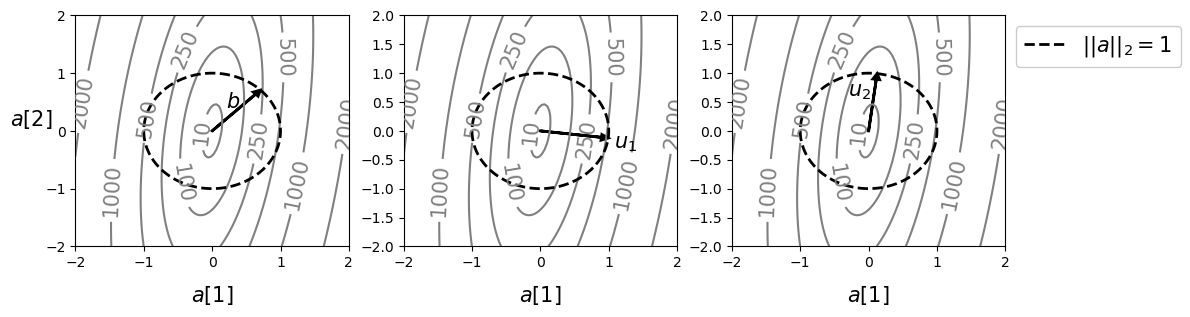

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(12,3),width_ratios=[1,1,1])
    
CS = axes[0].contour(X, Y, Z, levels = level_list,colors='gray')#levels=30,cmap='RdGy');
axes[0].clabel(CS, fontsize=font_size_ticks, inline=1,fmt = '%1.0f')#,ticks=Contourrange)
axes[0].plot(np.cos(inds),np.sin(inds),'--',color='black',lw=2,label=r"$||a||_2=1$")
axes[0].arrow(0, 0, np.cos(np.pi/4), np.sin(np.pi/4), head_width=0.1, head_length=0.1, fc='black', ec='black',length_includes_head=True,lw=2)
axes[0].text(0.2,0.4,r"$b$",fontsize=font_size)
axes[0].set_xticks(tick_aux) 
axes[0].set_yticks(tick_aux)
h = axes[0].set_ylabel(r"$a[2]$", fontsize=font_size,labelpad=10)
h.set_rotation(0)
axes[0].set_xlabel(r"$a[1]$", fontsize=font_size,labelpad=10)

CS = axes[1].contour(X, Y, Z, levels = level_list,colors='gray')#levels=30,cmap='RdGy');
axes[1].clabel(CS, fontsize=font_size_ticks, inline=1,fmt = '%1.0f')#,ticks=Contourrange)
axes[1].plot(np.cos(inds),np.sin(inds),'--',color='black',lw=2,label=r"$||a||_2=1$")
axes[1].arrow(0, 0, u_1[0], u_1[1], head_width=0.1, head_length=0.1, fc='black', ec='black',
          length_includes_head=True,lw=2)
axes[1].text(1.075,-0.3,r"$u_1$",fontsize=font_size)
axes[1].set_xticks(tick_aux) 
axes[1].set_xlabel(r"$a[1]$", fontsize=font_size,labelpad=10)

CS = axes[2].contour(X, Y, Z, levels = level_list,colors='gray')#levels=30,cmap='RdGy');
axes[2].clabel(CS, fontsize=font_size_ticks, inline=1,fmt = '%1.0f')#,ticks=Contourrange)
axes[2].plot(np.cos(inds),np.sin(inds),'--',color='black',lw=2,label=r"$||a||_2=1$")
axes[2].arrow(0, 0, u_2[0], u_2[1], head_width=0.1, head_length=0.1, fc='black', ec='black',length_includes_head=True,lw=2)
axes[2].text(-0.3,0.6,r"$u_2$",fontsize=font_size)
axes[2].set_xticks(tick_aux) 
axes[2].set_xlabel(r"$a[1]$", fontsize=font_size,labelpad=10)
axes[2].legend(fontsize=font_size,framealpha=1,bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

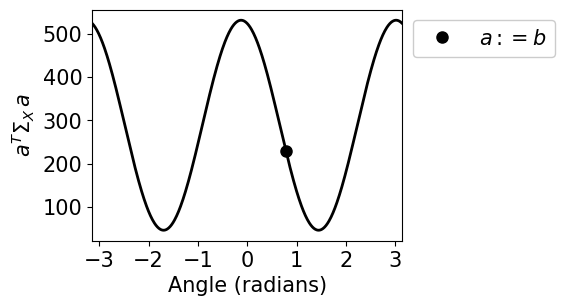

In [8]:
fig = plt.figure(figsize = (4,3)) 
plt.plot(inds,quad_form(np.cos(inds),np.sin(inds)),lw=2,color="black")
plt.plot(np.pi/4,228.9517,"o",markersize=8,color="black",label=r"$a:=b$")
plt.xlim(-np.pi,np.pi)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
h = plt.ylabel(r"$a^T \Sigma_{X} \, a$", fontsize=font_size)
plt.xlabel("Angle (radians)", fontsize=font_size)
plt.legend(fontsize=font_size,framealpha=1,bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

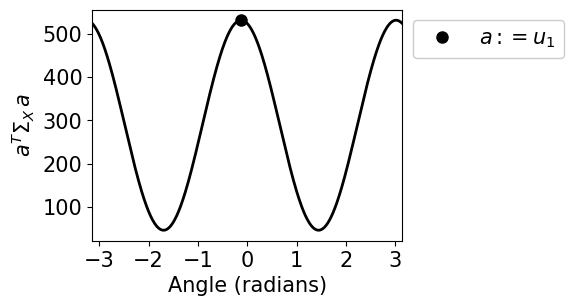

In [9]:
fig = plt.figure(figsize = (4,3)) 
plt.plot(inds,quad_form(np.cos(inds),np.sin(inds)),lw=2,color="black")
plt.plot(np.arctan(U[1,0]/U[0,0]),eigval[0],"o",markersize=8,color="black",label=r"$a:=u_1$")
plt.xlim(-np.pi,np.pi)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
h = plt.ylabel(r"$a^T \Sigma_{X} \, a$", fontsize=font_size)
plt.xlabel("Angle (radians)", fontsize=font_size)
plt.legend(fontsize=font_size,framealpha=1,bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

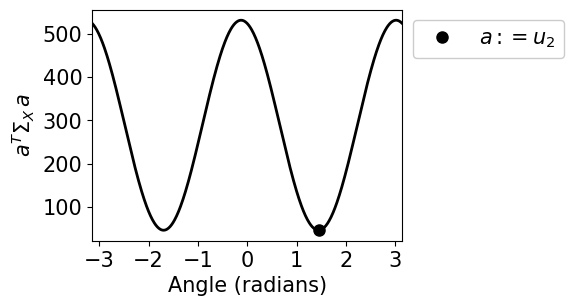

In [10]:
fig = plt.figure(figsize = (4,3)) 
plt.plot(inds,quad_form(np.cos(inds),np.sin(inds)),lw=2,color="black")
plt.plot(np.arctan(U[1,1]/U[0,1]),eigval[1],"o",markersize=8,color="black",label=r"$a:=u_2$")
plt.xlim(-np.pi,np.pi)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
h = plt.ylabel(r"$a^T \Sigma_{X} \, a$", fontsize=font_size)
plt.xlabel("Angle (radians)", fontsize=font_size)
plt.legend(fontsize=font_size,framealpha=1,bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

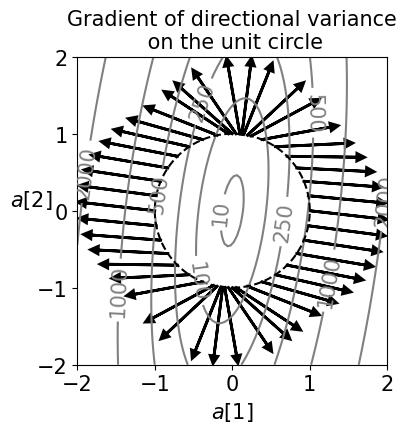

In [11]:
vecs = [U[:,1],-U[:,1]]
step = np.pi/16
mini_step = np.pi/64
for angle in np.arange(-np.pi/4-3*step,np.pi/4+3*step,step):
    vecs.append(np.array([np.cos(angle), np.sin(angle)]))
    vecs.append(np.array([-np.cos(angle), -np.sin(angle)]))
for angle in np.arange(np.pi/4+2.5*step+mini_step,np.pi/4+4*step+2*mini_step,mini_step):
    vecs.append(np.array([np.cos(angle), np.sin(angle)]))
    vecs.append(np.array([-np.cos(angle), -np.sin(angle)]))

fig = plt.figure(figsize = (4,4)) 
CS = plt.contour(X, Y, Z, levels = level_list,colors='gray',alpha=1)#levels=30,cmap='RdGy');
plt.clabel(CS, fontsize=font_size_ticks, inline=1,fmt = '%1.0f')#,ticks=Contourrange)
plt.plot(np.cos(inds),np.sin(inds),'--',color='black')
#ax = plt.axes()
for i,v in enumerate(vecs):
    Av = 2 * cov @ v
    Avn = Av / np.linalg.norm(Av)
    plt.arrow(v[0], v[1], Avn[0], Avn[1], head_width=0.1, head_length=0.1,lw=2, fc='black', ec='black',length_includes_head=True)
# plt.colorbar()
plt.xticks(tick_aux,fontsize=font_size_ticks) 
plt.yticks(tick_aux,fontsize=font_size_ticks)
h = plt.ylabel(r"$a[2]$", fontsize=font_size)
h.set_rotation(0)
plt.xlabel(r"$a[1]$", fontsize=font_size)
plt.title("Gradient of directional variance\n on the unit circle",fontsize=font_size);

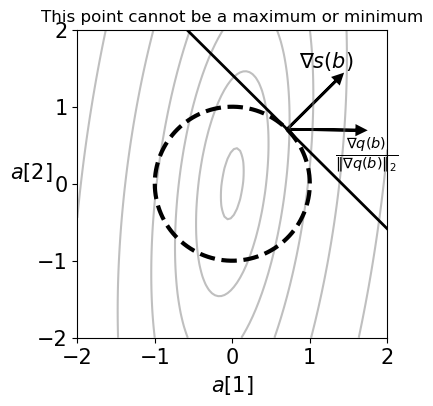

In [12]:
vecs_tan = [np.array([np.cos(np.pi/4), np.sin(np.pi/4)])]
fig = plt.figure(figsize = (4,4)) 
plt.xlim(-2,2)
plt.ylim(-2,2)
CS = plt.contour(X, Y, Z, levels = level_list,colors='gray',alpha=0.5)#levels=30,cmap='RdGy');
plt.plot(np.cos(inds),np.sin(inds),'--',color='black',lw=3)
for i,v in enumerate(vecs_tan):
    Av = 2 * cov @ v
    Avn = Av / np.linalg.norm(Av)
    plt.plot([v[0]-4*v[1],v[0]+4*v[1]],[v[1]+4*v[0],v[1]-4*v[0]],ls='solid',color='black',lw=2)
    plt.arrow(v[0], v[1], Avn[0], Avn[1], head_width=0.1, head_length=0.1, fc='black',ec='black',length_includes_head=True,lw=2)   
    plt.arrow(v[0], v[1], 1/np.sqrt(2), 1/np.sqrt(2), head_width=0.1, head_length=0.1, fc='black',ec='black',length_includes_head=True,lw=2)   
plt.text(v[0]+ 1/np.sqrt(2)-0.55,v[1]+ 1/np.sqrt(2)+0.1,r"$\nabla s(b)$",fontsize=font_size_graph)
plt.text(v[0]+ Avn[0]-0.38,v[1]+ Avn[1]-0.38,r"$\frac{\nabla q(b)}{\|\nabla q(b)\|_2}$",fontsize=font_size_graph)
plt.xticks(tick_aux,fontsize=font_size_ticks) 
plt.yticks(tick_aux,fontsize=font_size_ticks)
h = plt.ylabel(r"$a[2]$", fontsize=font_size)
h.set_rotation(0)
plt.xlabel(r"$a[1]$", fontsize=font_size)
plt.title("This point cannot be a maximum or minimum");

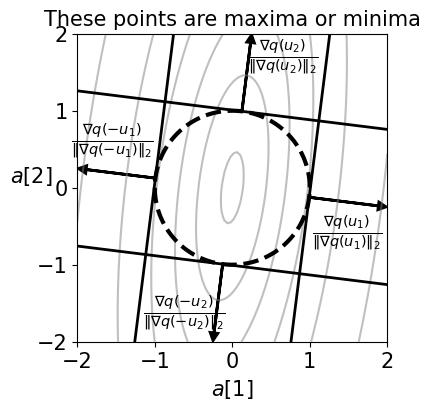

In [13]:
vecs_tan = [U[:,1],U[:,0],-U[:,1],-U[:,0]]
fig = plt.figure(figsize = (4,4)) 
plt.xlim(-2,2)
plt.ylim(-2,2)
CS = plt.contour(X, Y, Z, levels = level_list,colors='gray',alpha=0.5)#levels=30,cmap='RdGy');
# plt.clabel(CS, fontsize=10, inline=1,fmt = '%1.0f')#,ticks=Contourrange)
plt.plot(np.cos(inds),np.sin(inds),'--',color='black',lw=3)
u1 = U[:,0]
grad_u1 = 2 * cov @ u1
grad_u1_norm = grad_u1 / np.linalg.norm(grad_u1)
plt.arrow(u1[0], u1[1], grad_u1_norm[0], grad_u1_norm[1], head_width=0.1, head_length=0.1, fc='black', ec='black',length_includes_head=True,lw=2) 
plt.text(u1[0]+ grad_u1_norm[0]-0.95,u1[1]+ grad_u1_norm[1]-0.4,r"$\frac{\nabla q(u_1)}{\|\nabla q(u_1)\|_2}$",fontsize=font_size_graph)
plt.arrow(-u1[0], -u1[1], -grad_u1_norm[0], -grad_u1_norm[1], head_width=0.1, head_length=0.1, fc='black', ec='black',length_includes_head=True,lw=2) 
plt.text(-u1[0]- grad_u1_norm[0]-0.1,-u1[1]- grad_u1_norm[1]+0.3,r"$\frac{\nabla q(-u_1)}{\|\nabla q(-u_1)\|_2}$",fontsize=font_size_graph)
u2 = U[:,1]
grad_u2 = 2 * cov @ u2
grad_u2_norm = grad_u2 / np.linalg.norm(grad_u2)
plt.arrow(u2[0], u2[1], grad_u2_norm[0], grad_u2_norm[1], head_width=0.1, head_length=0.1, fc='black', ec='black',length_includes_head=True,lw=2) 
plt.text(u2[0]+ grad_u2_norm[0]-0.04,u2[1]+ grad_u2_norm[1]-0.35,r"$\frac{\nabla q(u_2)}{\|\nabla q(u_2)\|_2}$",fontsize=font_size_graph)
plt.arrow(-u2[0], -u2[1], -grad_u2_norm[0], -grad_u2_norm[1], head_width=0.1, head_length=0.1, fc='black', ec='black',length_includes_head=True,lw=2) 
plt.text(-u2[0]- grad_u2_norm[0]-0.9,-u2[1]- grad_u2_norm[1]+0.3,r"$\frac{\nabla q(-u_2)}{\|\nabla q(-u_2)\|_2}$",fontsize=font_size_graph)
for i,v in enumerate(vecs_tan):
    plt.plot([v[0]-4*v[1],v[0]+4*v[1]],[v[1]+4*v[0],v[1]-4*v[0]],ls='solid',color='black',lw=2)
plt.xticks(tick_aux,fontsize=font_size_ticks) 
plt.yticks(tick_aux,fontsize=font_size_ticks)
h = plt.ylabel(r"$a[2]$", fontsize=font_size)
h.set_rotation(0)
plt.xlabel(r"$a[1]$", fontsize=font_size)
plt.title("These points are maxima or minima",fontsize=font_size);

(2, 247)


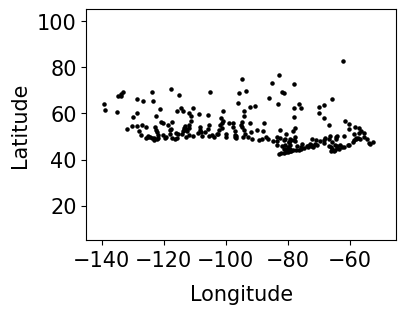

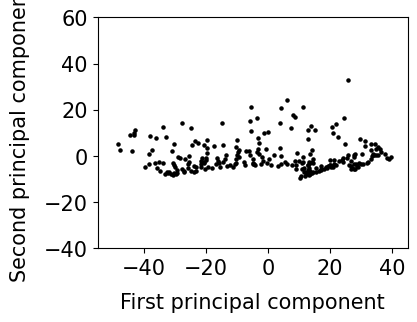

In [14]:
fig = plt.figure(figsize = (4,3)) 
plt.scatter(longitude,latitude, s=5, c="black", marker='o', edgecolor="black")
plt.xlim(-145,-45)
plt.ylim(5,105)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylabel("Latitude", fontsize=font_size,labelpad=5)
plt.xlabel("Longitude", fontsize=font_size,labelpad=10)

centered_data = np.vstack((longitude_c,latitude_c))
print(centered_data.shape)
pc_1 = u_1.T @ centered_data
pc_2 = u_2.T @ centered_data

fig = plt.figure(figsize = (4,3)) 
plt.scatter(pc_1,pc_2,  s=5, c="black", marker='o', edgecolor="black")
plt.xlim(-55,45)
plt.ylim(-40,60)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylabel("Second principal component", fontsize=font_size,labelpad=10)
plt.xlabel("First principal component", fontsize=font_size,labelpad=10);